In [18]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# Load data

In [19]:
emotion_labels = {0:'angry', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
target_labels = [val for key, val in emotion_labels.items()]
targets = [key for key, val in emotion_labels.items()]

In [20]:
df = pd.read_csv('../data/fer_data.csv')
df.head()

,usage,emotion,pixels
0,train,3,108 83 63 65 89 111 121 121 125 111 103 105 11...
1,train,3,137 142 159 162 158 134 113 167 174 177 164 12...
2,train,3,111 148 155 167 181 191 194 193 195 199 203 20...
3,train,3,151 156 121 100 80 116 151 169 183 185 192 190...
4,train,3,248 187 149 130 97 140 139 117 197 251 231 255...


In [4]:
df_sift = pd.read_csv('../data/sift_data.csv')
df_sift.head()

,usage,emotion,histogram
0,train,3,0 1 0 2 1 0 1 0 0 0 0 0 0 3 0 0 0 0 3 0 1 0 1 ...
1,train,3,0 2 0 0 0 0 0 0 1 3 1 0 2 2 2 0 2 4 0 1 0 0 0 ...
2,train,3,1 0 2 2 1 0 1 1 3 1 0 1 2 0 0 0 0 1 0 0 2 2 3 ...
3,train,3,0 0 0 0 0 0 0 0 1 0 0 2 0 1 1 2 0 1 1 0 0 0 0 ...
4,train,3,1 2 1 1 1 1 0 0 1 1 4 1 2 0 2 1 5 5 2 2 0 0 0 ...


In [5]:
df_sift_k6 = pd.read_csv('../data/sift_k6.csv')
df_sift_k6.head()

,usage,emotion,histogram
0,train,3,3 7 2 1 5
1,train,3,4 6 0 4 11
2,train,3,5 8 3 3 10
3,train,3,5 2 0 3 5
4,train,3,5 13 2 7 11


In [21]:
def load_data(df, sift):
    image_data = []
    image_scaled = []
    
    for index, row in df.iterrows():
        if sift == 1:
            field = row.histogram
        else:
            field = row.pixels
        image = np.fromstring(field, dtype=int, sep=' ')
        scale = image / 255.0
        #image = np.reshape(image, (48, 48))
        image_data.append(image)
        image_scaled.append(scale)
        
    return image_data, image_scaled

# SVM with original dataset

In [7]:
df_train = df[df['usage']=='train']
df_test = df[df['usage']=='test']
train_data = load_data(df_train, 0)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 0)
test_target = list(df_test.emotion)

In [8]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28262, 2304)
(28262,)
(7066, 2304)
(7066,)


In [52]:
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred1 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test1 = y_test

Test Accuracy: 0.316


## Evaluation

### Confusion matrix

In [87]:
y_pred = y_pred1
y_test = y_test1
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=targets)
confmat

array([[  62,    2,  892,    1,    0,    0],
       [   1,   89,  930,    1,    2,    1],
       [   0,    0, 1772,    0,    1,    1],
       [   1,    3, 1203,   39,    0,    1],
       [   0,    4,  600,    0,  227,    0],
       [   0,    0, 1189,    1,    0,   43]])

In [14]:
def show_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')


    ax.set_xticklabels([''] + target_labels)
    ax.set_yticklabels([''] + target_labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_51682/1833250243.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + target_labels)
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_51682/1833250243.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + target_labels)


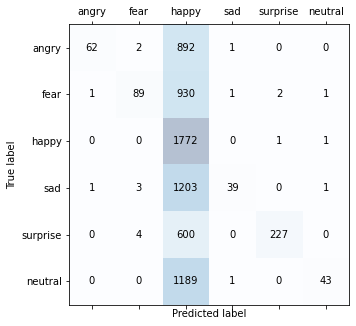

In [93]:
show_confusion_matrix(confmat)

### Parformance matrics

In [84]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Precision: 0.833
Recall: 0.248
F1: 0.210
Accuracy: 0.316


### Classification reports

In [86]:
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

       angry       0.97      0.06      0.12       957
        fear       0.91      0.09      0.16      1024
       happy       0.27      1.00      0.42      1774
         sad       0.93      0.03      0.06      1247
    surprise       0.99      0.27      0.43       831
     neutral       0.93      0.03      0.07      1233

    accuracy                           0.32      7066
   macro avg       0.83      0.25      0.21      7066
weighted avg       0.77      0.32      0.22      7066



### ROC curve

# SVM with SIFT

In [105]:
df_train = df_sift[df_sift['usage']=='train']
df_test = df_sift[df_sift['usage']=='test']
train_data = load_data(df_train, 1)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 1)
test_target = list(df_test.emotion)

In [106]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28257, 29)
(28257,)
(7065, 29)
(7065,)


In [108]:
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test2 = y_test

Test Accuracy: 0.231


## Tuning hyperparameters 

## Visualizing learning curves and validation curves

In [34]:
type(targets)

set

## Evaluation

### Confusion matrix

In [109]:
y_pred = y_pred2
y_test = y_test2
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=targets)
confmat

array([[  24,   27,  717,   86,   29,   74],
       [  18,   34,  758,   98,   30,   86],
       [  33,   63, 1348,  138,   54,  137],
       [  29,   29,  953,   97,   32,  107],
       [   7,   32,  615,   58,   45,   74],
       [  27,   34,  972,   74,   39,   87]])

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_51682/1833250243.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + target_labels)
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_51682/1833250243.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + target_labels)


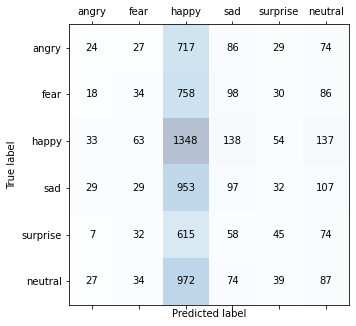

In [110]:
show_confusion_matrix(confmat)

### Parformance matrics

In [111]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Precision: 0.185
Recall: 0.170
F1: 0.128
Accuracy: 0.231


### Classification reports

In [112]:
print(classification_report(y_test, y_pred, target_names=list(target_labels)))

              precision    recall  f1-score   support

       angry       0.17      0.03      0.04       957
        fear       0.16      0.03      0.05      1024
       happy       0.25      0.76      0.38      1773
         sad       0.18      0.08      0.11      1247
    surprise       0.20      0.05      0.08       831
     neutral       0.15      0.07      0.10      1233

    accuracy                           0.23      7065
   macro avg       0.18      0.17      0.13      7065
weighted avg       0.19      0.23      0.15      7065



### ROC curve

# SVM with SIFT (K6)

In [96]:
df_train = df_sift_k6[df_sift_k6['usage']=='train']
df_test = df_sift_k6[df_sift_k6['usage']=='test']
train_data = load_data(df_train, 1)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 1)
test_target = list(df_test.emotion)

In [97]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)

In [98]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28257, 5)
(28257,)
(7065, 5)
(7065,)


In [99]:
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred3 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test3 = y_test

Test Accuracy: 0.252


## Tuning hyperparameters 

## Visualizing learning curves and validation curves

In [34]:
type(targets)

set

## Evaluation

### Confusion matrix

In [100]:
y_pred = y_pred3
y_test = y_test3
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=targets)
confmat

array([[   0,    3,  946,    1,    0,    7],
       [   1,    2, 1012,    4,    0,    5],
       [   2,    2, 1742,    1,    0,   26],
       [   1,    3, 1230,    0,    0,   13],
       [   0,    1,  820,    2,    0,    8],
       [   0,    3, 1194,    1,    0,   35]])

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_51682/1833250243.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + target_labels)
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_51682/1833250243.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + target_labels)


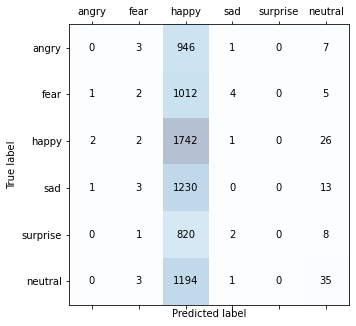

In [101]:
show_confusion_matrix(confmat)

### Parformance matrics

In [102]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Precision: 0.128
Recall: 0.169
F1: 0.076
Accuracy: 0.252


/Users/chikakoolsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Classification reports

In [103]:
print(classification_report(y_test, y_pred, target_names=list(target_labels)))

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       957
        fear       0.14      0.00      0.00      1024
       happy       0.25      0.98      0.40      1773
         sad       0.00      0.00      0.00      1247
    surprise       0.00      0.00      0.00       831
     neutral       0.37      0.03      0.05      1233

    accuracy                           0.25      7065
   macro avg       0.13      0.17      0.08      7065
weighted avg       0.15      0.25      0.11      7065



/Users/chikakoolsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chikakoolsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chikakoolsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### ROC curve

# SVM with PCA

In [10]:
df_train = df[df['usage']=='train']
df_test = df[df['usage']=='test']
train_data = load_data(df_train, 0)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 0)
test_target = list(df_test.emotion)

In [11]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)

In [ ]:
clf = make_pipeline(PCA(n_components=104, whiten=True),
                       LinearSVC(C=1.0))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

In [ ]:
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

In [12]:
clf = make_pipeline(PCA(n_components=104, whiten=True),
                    SVC(C=5, random_state=1, kernel='rbf', gamma=0.01))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.488


## Evaluation

### Confusion matrix

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61748/1833250243.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + target_labels)
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61748/1833250243.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + target_labels)


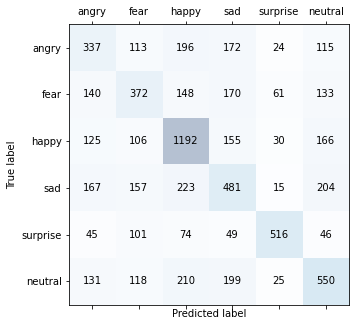

In [15]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=targets)
show_confusion_matrix(confmat)

### Parformance matrics

In [16]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Precision: 0.490
Recall: 0.473
F1: 0.480
Accuracy: 0.488


### Classification reports

In [17]:
print(classification_report(y_test, y_pred, target_names=list(target_labels)))

              precision    recall  f1-score   support

       angry       0.36      0.35      0.35       957
        fear       0.38      0.36      0.37      1024
       happy       0.58      0.67      0.62      1774
         sad       0.39      0.39      0.39      1247
    surprise       0.77      0.62      0.69       831
     neutral       0.45      0.45      0.45      1233

    accuracy                           0.49      7066
   macro avg       0.49      0.47      0.48      7066
weighted avg       0.49      0.49      0.49      7066



# SVM with PCA and scaled data

In [22]:
df_train = df[df['usage']=='train']
df_test = df[df['usage']=='test']
train_data, train_scaled = load_data(df_train, 0)
train_target = list(df_train.emotion)
test_data, test_scaled = load_data(df_test, 0)
test_target = list(df_test.emotion)

In [23]:
X_train = np.array(train_scaled)
y_train = np.array(train_target)
X_test = np.array(test_scaled)
y_test = np.array(test_target)

In [24]:
clf = make_pipeline(PCA(n_components=104, whiten=True),
                       LinearSVC(C=1.0))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

/Users/chikakoolsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test Accuracy: 0.378


In [26]:
print(confusion_matrix(y_pred, y_test))
plt.show()

[[  80   54   47   77   19   44]
 [  27   56   25   38   28   27]
 [ 426  391 1376  451  195  499]
 [ 174  166  141  361   77  190]
 [ 102  180   81  105  424  102]
 [ 148  177  104  215   88  371]]


In [27]:
clf = make_pipeline(PCA(n_components=104, whiten=True),
                    SVC(C=5, random_state=1, kernel='rbf', gamma=0.01))

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.491


## Evaluation

### Confusion matrix

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61748/1833250243.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + target_labels)
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_61748/1833250243.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + target_labels)


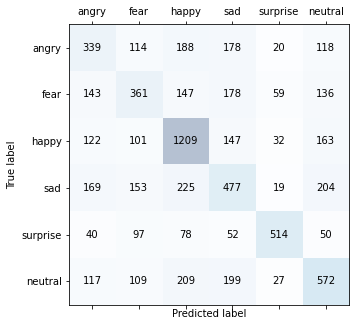

In [28]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=targets)
show_confusion_matrix(confmat)

### Parformance matrics

In [29]:
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))

Precision: 0.492
Recall: 0.476
F1: 0.482
Accuracy: 0.491


### Classification reports

In [30]:
print(classification_report(y_test, y_pred, target_names=list(target_labels)))

              precision    recall  f1-score   support

       angry       0.36      0.35      0.36       957
        fear       0.39      0.35      0.37      1024
       happy       0.59      0.68      0.63      1774
         sad       0.39      0.38      0.38      1247
    surprise       0.77      0.62      0.68       831
     neutral       0.46      0.46      0.46      1233

    accuracy                           0.49      7066
   macro avg       0.49      0.48      0.48      7066
weighted avg       0.49      0.49      0.49      7066

